In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
from sklearn.preprocessing import LabelEncoder


In [3]:
data = pd.read_csv("Dataset.csv")

In [4]:
data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label_encoder = LabelEncoder()
data['job_column_name'] = label_encoder.fit_transform(data['job_column_name'])
data['marital_column_name'] = label_encoder.fit_transform(data['marital_column_name'])
data['education_column_name'] = label_encoder.fit_transform(data['education_column_name'])
data['Default_column_name'] = label_encoder.fit_transform(data['Default_column_name'])
data['Housing_column_name'] = label_encoder.fit_transform(data['Housing_column_name'])
data['Loan_column_name'] = label_encoder.fit_transform(data['Loan_column_name'])
data['Contact_column_name'] = label_encoder.fit_transform(data['Contact_column_name'])
data['Month_column_name'] = label_encoder.fit_transform(data['Month_column_name'])
data['Poutcome_column_name'] = label_encoder.fit_transform(data['Poutcome_column_name'])

KeyError: 'job_column_name'

In [13]:
# Handle categorical variables using LabelEncoder
label_encoder = LabelEncoder()
data['Job'] = label_encoder.fit_transform(data['Job'])
data['Marital'] = label_encoder.fit_transform(data['Marital'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Default'] = label_encoder.fit_transform(data['Default'])
data['Housing'] = label_encoder.fit_transform(data['Housing'])
data['Loan'] = label_encoder.fit_transform(data['Loan'])
data['Contact'] = label_encoder.fit_transform(data['Contact'])
data['Month'] = label_encoder.fit_transform(data['Month'])
data['Poutcome'] = label_encoder.fit_transform(data['Poutcome'])


KeyError: 'Job'

In [14]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [15]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [16]:
X = data.drop('y', axis=1)
Y = data['y']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
decision_tree = DecisionTreeClassifier(random_state=42)



In [20]:
decision_tree.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = decision_tree.predict(X_test)

In [21]:
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8718232044198895
Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.92      0.93       807
         yes       0.42      0.47      0.44        98

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.68       905
weighted avg       0.88      0.87      0.88       905

Confusion Matrix:
 [[743  64]
 [ 52  46]]


In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

[Text(726.3892112874519, 530.6571428571428, 'duration <= 645.5\ngini = 0.207\nsamples = 3616\nvalue = [3193, 423]\nclass = No'),
 Text(454.9664973301691, 504.7714285714286, 'duration <= 211.5\ngini = 0.153\nsamples = 3333\nvalue = [3054, 279]\nclass = No'),
 Text(187.5828760011866, 478.8857142857143, 'month <= 9.5\ngini = 0.057\nsamples = 2028\nvalue = [1968, 60]\nclass = No'),
 Text(119.47782557104718, 453.0, 'age <= 20.0\ngini = 0.049\nsamples = 1978\nvalue = [1928, 50]\nclass = No'),
 Text(86.4339958469297, 427.11428571428576, 'balance <= 51.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Yes'),
 Text(82.90269949569861, 401.22857142857146, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(89.96529219816078, 401.22857142857146, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Yes'),
 Text(152.52165529516463, 427.11428571428576, 'age <= 70.5\ngini = 0.047\nsamples = 1975\nvalue = [1927, 48]\nclass = No'),
 Text(97.02788490062296, 401.22857142857146, 'poutcome <= 2.5

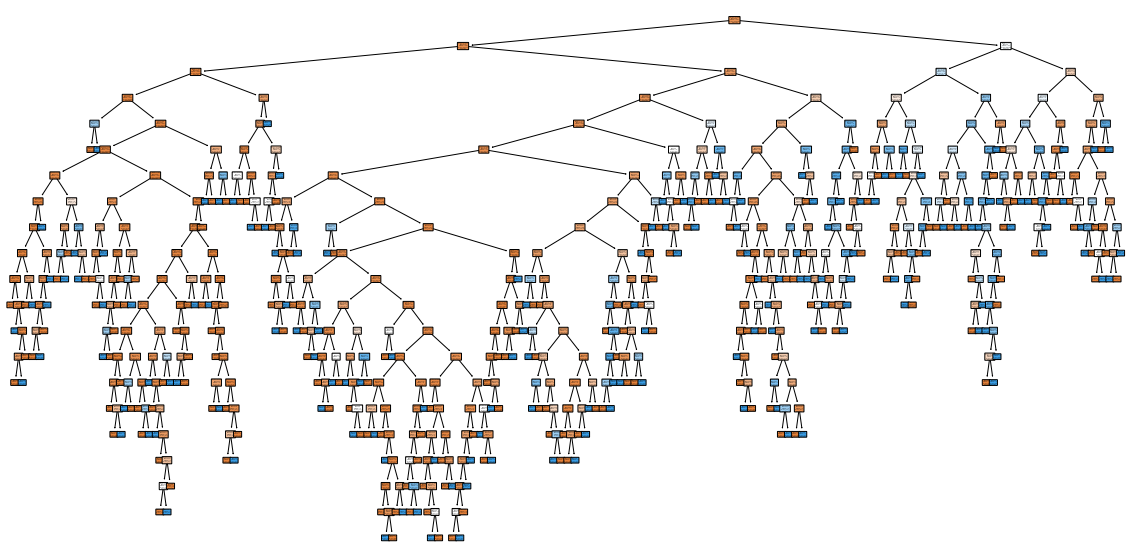

In [23]:
plt.figure(figsize=(20, 10))

# Plot the Decision Tree
plot_tree(decision_tree, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True)


In [24]:
plt.show()

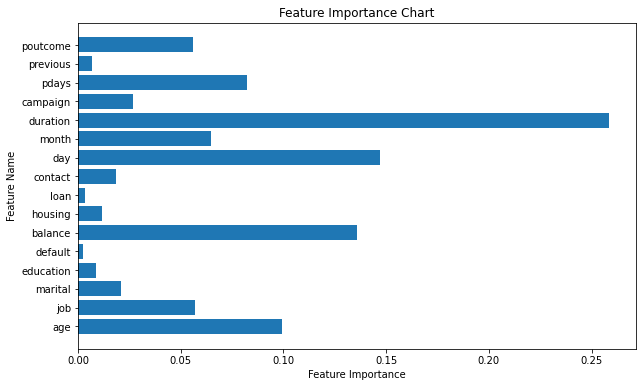

In [25]:
feature_importances = decision_tree.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance Chart')
plt.show()

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
naive_bayes = GaussianNB()

# Train the model on the training data
naive_bayes.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = naive_bayes.predict(X_test)

In [31]:
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8320441988950277
Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.88      0.90       807
         yes       0.31      0.45      0.37        98

    accuracy                           0.83       905
   macro avg       0.62      0.66      0.63       905
weighted avg       0.86      0.83      0.85       905

Confusion Matrix:
 [[709  98]
 [ 54  44]]


In [35]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Evaluate the Decision Tree model
decision_tree_accuracy = accuracy_score(Y_test, decision_tree.predict(X_test))
decision_tree_classification_report = classification_report(Y_test, decision_tree.predict(X_test))
decision_tree_roc_auc = roc_auc_score(Y_test, decision_tree.predict_proba(X_test)[:, 1])

# Evaluate the Gaussian Naive Bayes model
naive_bayes_accuracy = accuracy_score(Y_test, naive_bayes.predict(X_test))
naive_bayes_classification_report = classification_report(Y_test, naive_bayes.predict(X_test))
naive_bayes_roc_auc = roc_auc_score(Y_test, naive_bayes.predict_proba(X_test)[:, 1])

# Print the evaluation metrics for both models
print("Decision Tree Model:")
print("Accuracy:", decision_tree_accuracy)
print("Classification Report:\n", decision_tree_classification_report)
print("ROC AUC:", decision_tree_roc_auc)

print("\nGaussian Naive Bayes Model:")
print("Accuracy:", naive_bayes_accuracy)
print("Classification Report:\n", naive_bayes_classification_report)
print("ROC AUC:", naive_bayes_roc_auc)


Decision Tree Model:
Accuracy: 0.8718232044198895
Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.92      0.93       807
         yes       0.42      0.47      0.44        98

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.68       905
weighted avg       0.88      0.87      0.88       905

ROC AUC: 0.6950408416154568

Gaussian Naive Bayes Model:
Accuracy: 0.8320441988950277
Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.88      0.90       807
         yes       0.31      0.45      0.37        98

    accuracy                           0.83       905
   macro avg       0.62      0.66      0.63       905
weighted avg       0.86      0.83      0.85       905

ROC AUC: 0.807880029335154


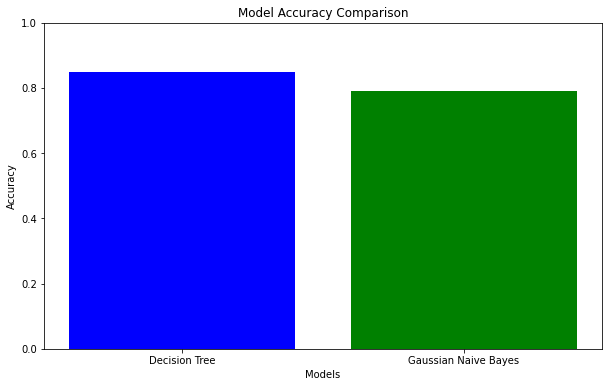

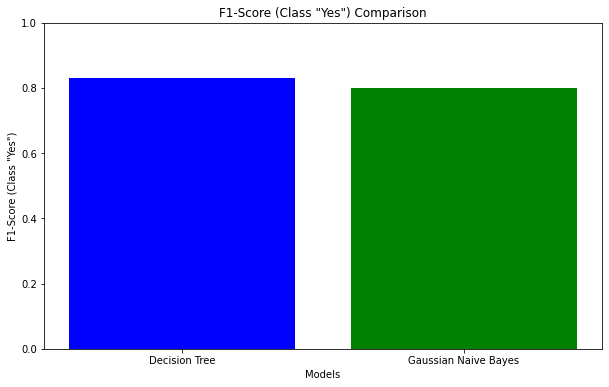

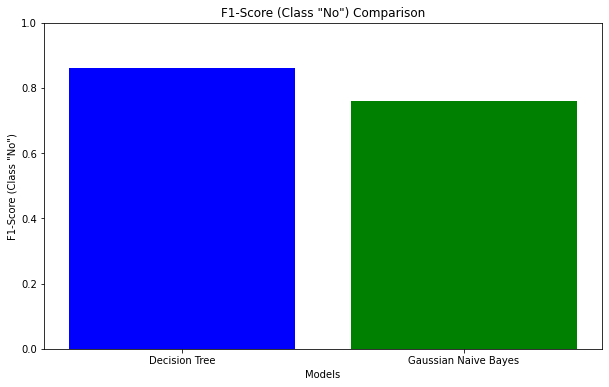

In [36]:


# Define model names and their corresponding metric values
models = ["Decision Tree", "Gaussian Naive Bayes"]
accuracy = [0.85, 0.79]  # Replace with your actual accuracy values
f1_score_yes = [0.83, 0.80]  # Replace with your actual F1-score values for class "Yes"
f1_score_no = [0.86, 0.76]  # Replace with your actual F1-score values for class "No"

# Create a bar chart to compare accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set the y-axis limits
plt.show()

# Create a bar chart to compare F1-score for class "Yes"
plt.figure(figsize=(10, 6))
plt.bar(models, f1_score_yes, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('F1-Score (Class "Yes")')
plt.title('F1-Score (Class "Yes") Comparison')
plt.ylim(0, 1)  # Set the y-axis limits
plt.show()

# Create a bar chart to compare F1-score for class "No"
plt.figure(figsize=(10, 6))
plt.bar(models, f1_score_no, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('F1-Score (Class "No")')
plt.title('F1-Score (Class "No") Comparison')
plt.ylim(0, 1)  # Set the y-axis limits
plt.show()
